# Import Important Libraries

In [658]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 30)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.2f}'.format)

# Data Over View

In [659]:
df = pd.read_csv(r'E:\documents\commited projects\Data Analysis projects\Data-Anlysis-And-EDA-With-Python\NYC Rolling Sales\nyc-rolling-sales.csv')

In [660]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [662]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [663]:
df.shape

(84548, 22)

In [664]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00
mean,10344.36,3.00,4237.22,376.22,10731.99,2.03,0.19,2.25,1789.32,1.66
std,7151.78,1.29,3568.26,658.14,1290.88,16.72,8.71,18.97,537.34,0.82
min,4.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,4231.00,2.00,1322.75,22.00,10305.00,0.00,0.00,1.00,1920.00,1.00
50%,8942.00,3.00,3311.00,50.00,11209.00,1.00,0.00,1.00,1940.00,2.00
75%,15987.25,4.00,6281.00,1001.00,11357.00,2.00,0.00,2.00,1965.00,2.00
max,26739.00,5.00,16322.00,9106.00,11694.00,1844.00,2261.00,2261.00,2017.00,4.00


# Data Cleaning

In [665]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [666]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [667]:
dash_values = 'SALE PRICE'
uniq = df[dash_values].unique()[:10]

# unique values with surrounding quotes to visualize leading/trailing whitespaces
for values in uniq:
    print(f'"{values}"')

"6625000"
" -  "
"3936272"
"8000000"
"3192840"
"16232000"
"10350000"
"1"
"499000"
"10"


In [668]:
# Count the number of spaces in each column
space_counts = df.map(lambda x: str(x).isspace()).sum()
total_space_count = space_counts.sum()

# Count the number of dashes in each column
dash_counts = df.map(lambda x: str(x).count(" -  ")).sum()
total_dash_counts = dash_counts.sum()

print(f"Space counts in each column:\n{space_counts}\nTotal space count: {total_space_count}")
print()
print(f"Dash counts in each column:\n{dash_counts}\nTotal Dash count: {total_dash_counts}")

Space counts in each column:
Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64
Total space count: 151520

Dash counts in each column:
Unnamed: 0             

Actually i have tried a lot to replace "-"  but it could't work like down below in the cell  because there is white spaces here so try not to replace only instead use strip Like down below

In [669]:
df = df.replace(' ', np.nan).infer_objects(copy=False)

# We can also replace simple way but for this we need to copy from the top " -  "
#df =df.replace(" -  ", np.nan).infer_objects(copy=False)

df = df.map(lambda x: np.nan if str(x).strip() == '-' else x)

<Axes: >

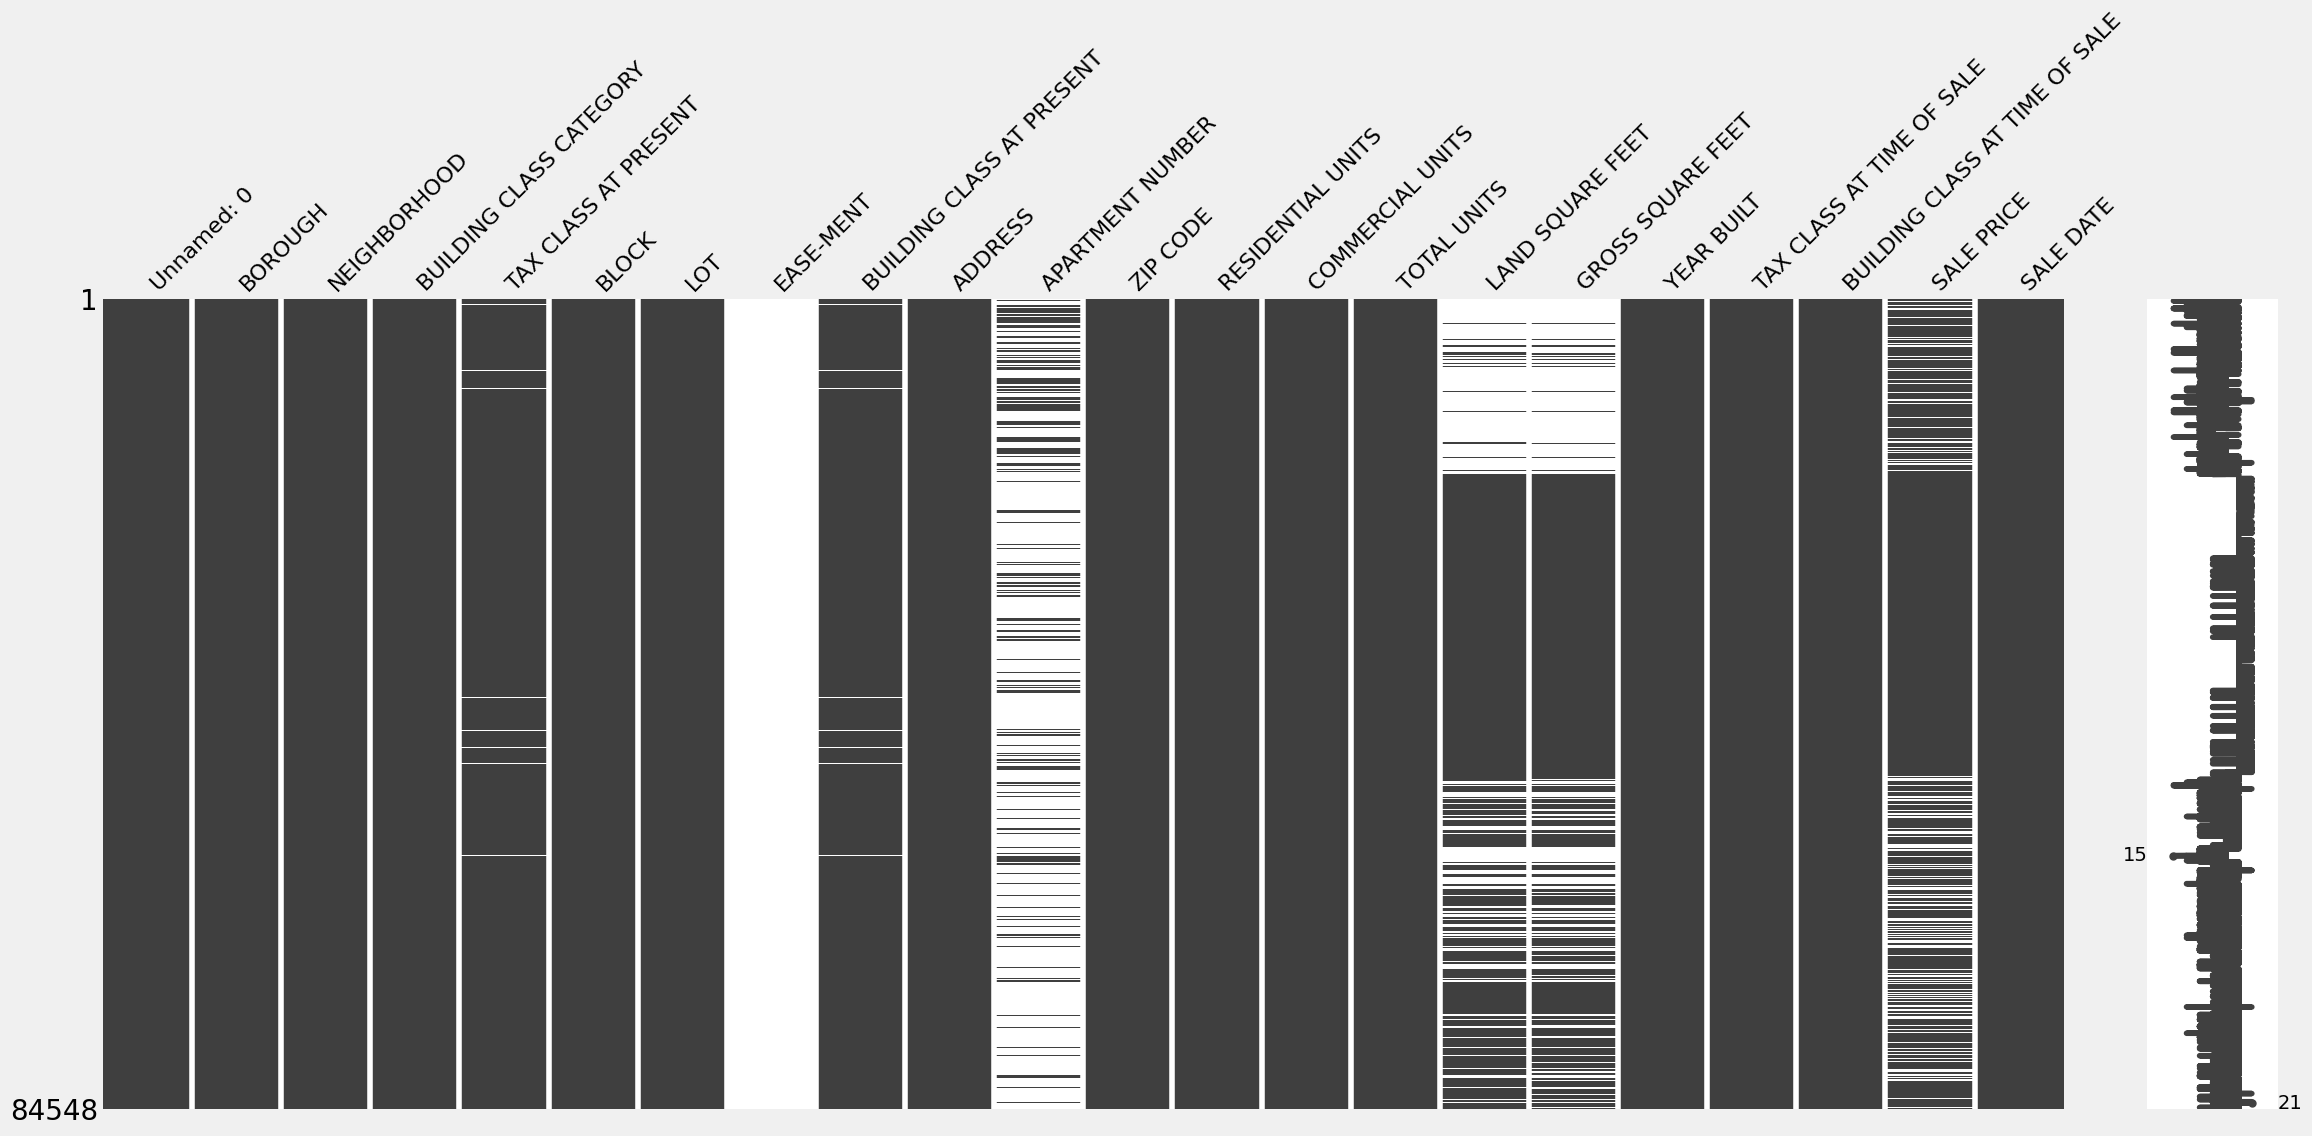

In [670]:
msn.matrix(df)

Let's delete the colums with null and one columns is useless so i drop it 

In [671]:
df = df.drop(columns = ['EASE-MENT', 'Unnamed: 0', 'APARTMENT NUMBER'], axis=1)

In [672]:
#actually i replace - and spaces to null to be easy for me to notice which has the most null and i'll simply drop it so now i drop all the null values 
df = df.dropna()

In [673]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [674]:
# Let's check if there is any duplicated value:
df.duplicated().sum()

348

In [675]:
df = df.drop_duplicates()

In [676]:
# now lets change the dtypes of some columns 
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [677]:
# Changing the dtype to numerical
col_dtypes = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for column in col_dtypes:
    df[column] = pd.to_numeric(df[column])

In [678]:
# Changing the dtype to category
categorical_columns = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for column in categorical_columns:
    df[column] = df[column].astype('category')

In [679]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [680]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,47544.00,47544.00,47544.00,47544.00,47544.00,47544.00,47544.00,47544.00,47544.00,47544.00,47544
mean,4993.79,227.85,10986.69,2.55,0.24,2.81,3295.12,3551.98,1841.98,1160689.62,2017-02-24 19:36:02.544169728
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2016-09-01 00:00:00
25%,2218.00,21.00,10470.00,1.00,0.00,1.00,1462.75,876.00,1920.00,100000.00,2016-11-29 00:00:00
50%,4666.00,45.00,11217.00,1.00,0.00,1.00,2150.00,1628.00,1931.00,483000.00,2017-02-24 00:00:00
75%,6983.75,90.00,11238.00,2.00,0.00,2.00,3076.00,2520.00,1961.00,830000.00,2017-05-25 00:00:00
max,16319.00,9009.00,11694.00,1844.00,2261.00,2261.00,4228300.00,3750565.00,2017.00,2210000000.00,2017-08-31 00:00:00
std,3431.77,490.69,801.63,17.23,10.89,20.50,30661.43,29311.44,437.15,13492068.30,NaN


# A Comprehensive View of Dataset Distributions

### Checking for outliars

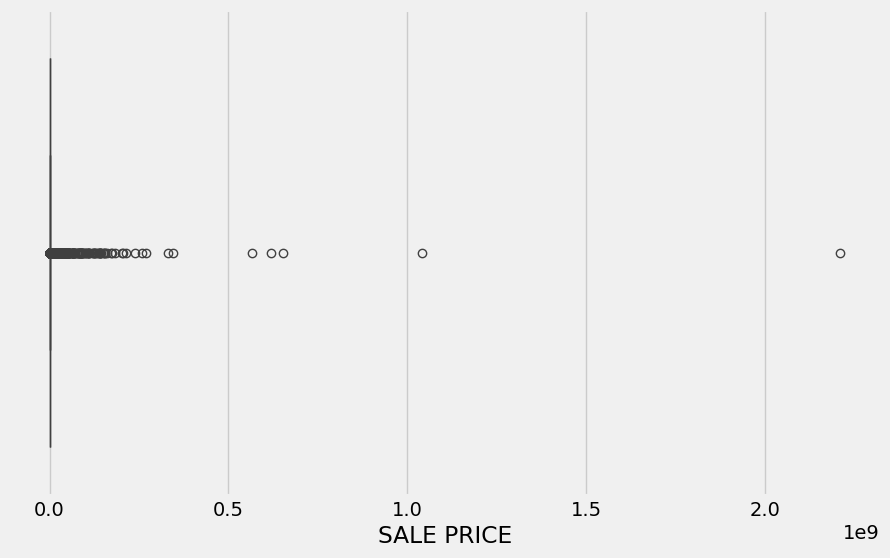

In [681]:
# To visulize the outliars
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'SALE PRICE', data= df)
plt.show()

* As i see that some values in sale price so high so we should drop these values to make the data more clear
* and also i'm gonna check for the values which is too low in price 

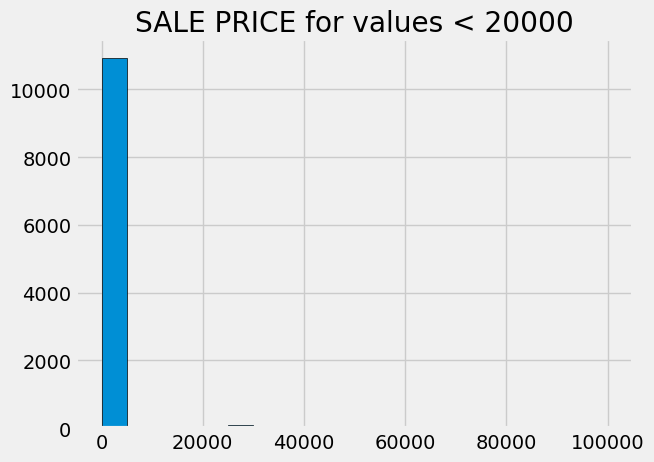

In [682]:
# Let's see the number of values within 100k
plt.hist(df[df['SALE PRICE'] < 100000]['SALE PRICE'], bins=20, edgecolor='black')
plt.title('SALE PRICE for values < 20000')
plt.show()

So i'm gonna drop the sale price less than 100k becuase there around 10 thousand values which is less than 1000 dollar so it's kind of huge out liar and more than 5 million there is some vilues which is in billion and it doesn't make any sense 

In [683]:
df[df['SALE PRICE'] > 5000000].count()[0]

1160

In [684]:
df[df['SALE PRICE'] < 100000].count()[0]

11846

In [685]:
df[(df['SALE PRICE'] < 100000) | (df['SALE PRICE'] >= 5000000)].count()[0]

13034

In [686]:
# Removing outliars 
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] <= 5000000)]

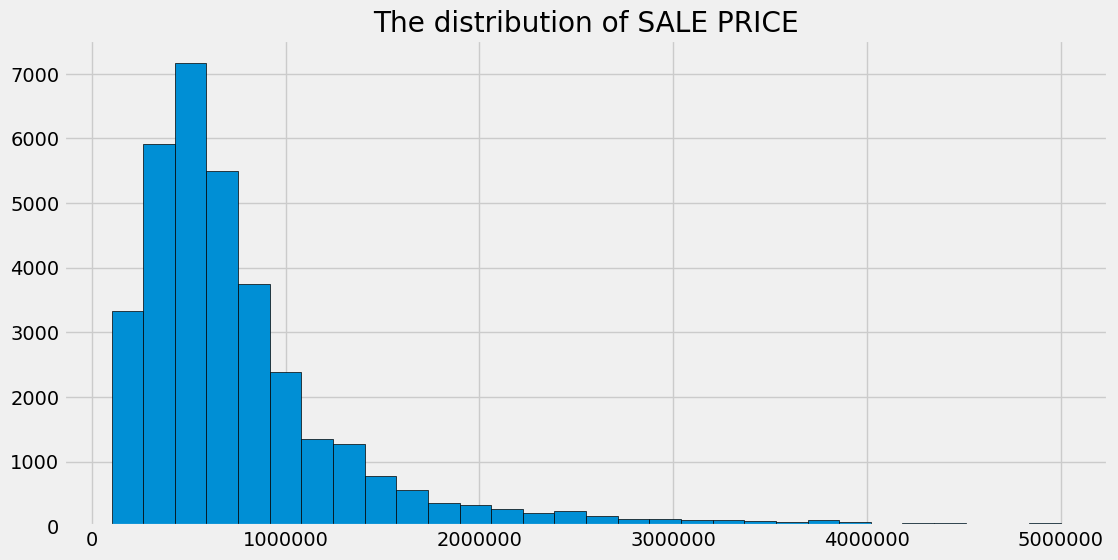

In [687]:
plt.figure(figsize=(12, 6))
plt.hist(df['SALE PRICE'], bins=30, edgecolor='black')
plt.title('The distribution of SALE PRICE')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

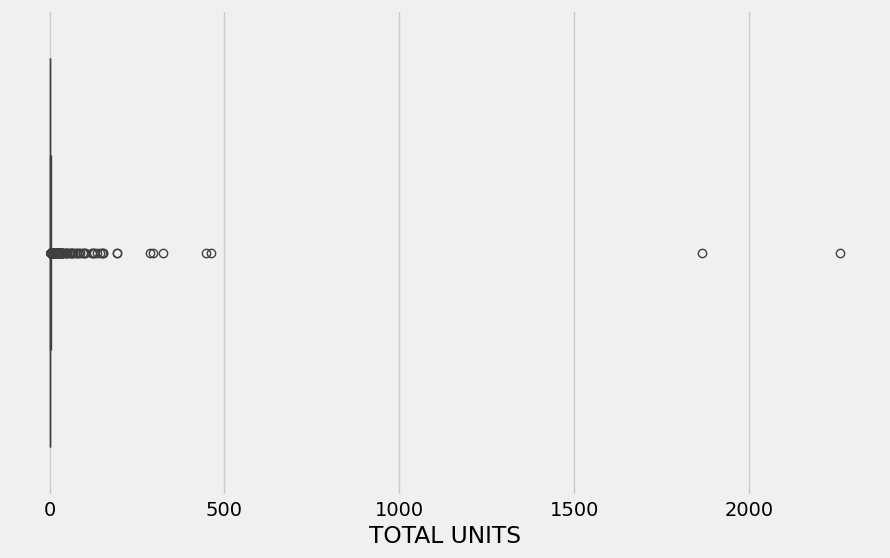

In [688]:
# Checking for outliars in Total units
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TOTAL UNITS'])
plt.show()

In [689]:
df[df['TOTAL UNITS'] > 20].count()[0]

95

In [690]:
df = df[df['TOTAL UNITS'] < 20]

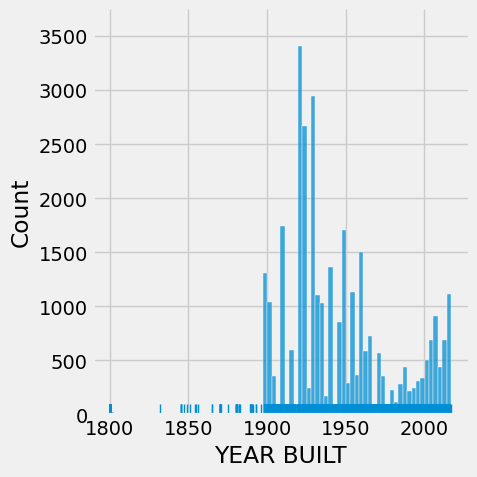

In [691]:
year_not_zero = df[df['YEAR BUILT'] !=0]
sns.displot(year_not_zero['YEAR BUILT'], rug=True)
plt.show()

In [692]:
df[df['YEAR BUILT'] ==0]['YEAR BUILT'].count()

1346

<Axes: xlabel='LAND SQUARE FEET', ylabel='SALE PRICE'>

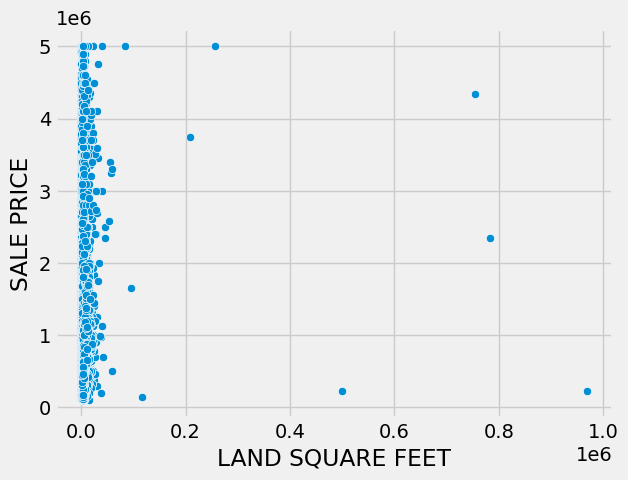

In [693]:
sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df)

In [694]:
Ot_land = df[df['LAND SQUARE FEET'] > 20000]
print(f'The number of values with land square footage greater than 50000 is about: {Ot_land.shape[0]}')

The number of values with land square footage greater than 50000 is about: 75


In [695]:
# Removing the outliars in land square feet 
df =df[df['LAND SQUARE FEET'] < 50000]

In [696]:
# we have to check how much is less than 50 square feet?
df['LAND SQUARE FEET'].min()

0

In [697]:
less_land = df[df['LAND SQUARE FEET'] < 500]
sqft_zero = df[df['LAND SQUARE FEET'] == 0]
print(f'The number of values with land square footage equal to 0 is about: {sqft_zero.shape[0]}')
print(f'The number of values with land square footage Less than 600 is about: {less_land.shape[0]}')

The number of values with land square footage equal to 0 is about: 7330
The number of values with land square footage Less than 600 is about: 7348


In [698]:
df = df[df['LAND SQUARE FEET'] > 500]

In [699]:
df.shape

(26952, 19)

<Axes: xlabel='LAND SQUARE FEET', ylabel='SALE PRICE'>

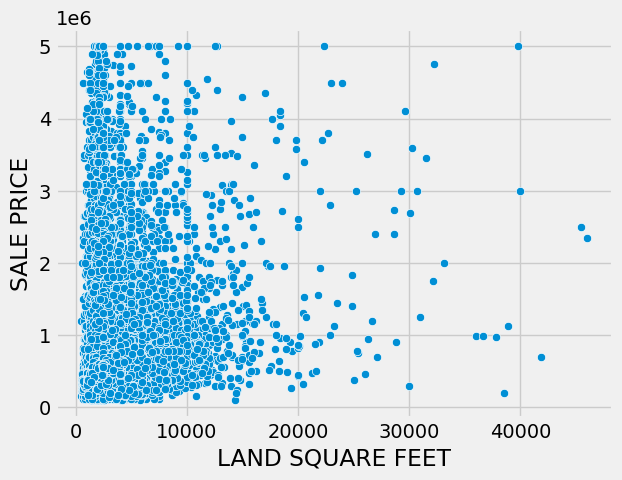

In [700]:
sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df)

Actually i have remove outliars in square feet land but still it show like most of the values is under 20k and show like the square feet doestn't matter in price 

In [701]:

df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

In [702]:
# I want to categorize price column according to price range

def price(row):
    if row['SALE PRICE'] <= 200000:
        return 'Cheap'
    elif row['SALE PRICE'] <= 600000:
        return 'Fear'
    elif row['SALE PRICE'] <= 1000000:
        return 'Average'
    elif row['SALE PRICE'] <= 2000000:
        return 'Expensive'
    else:
        return 'Most Expensive'

df['PRICE RANGE'] = df.apply(price, axis=1)

# The Overview and distribution of data across different columns

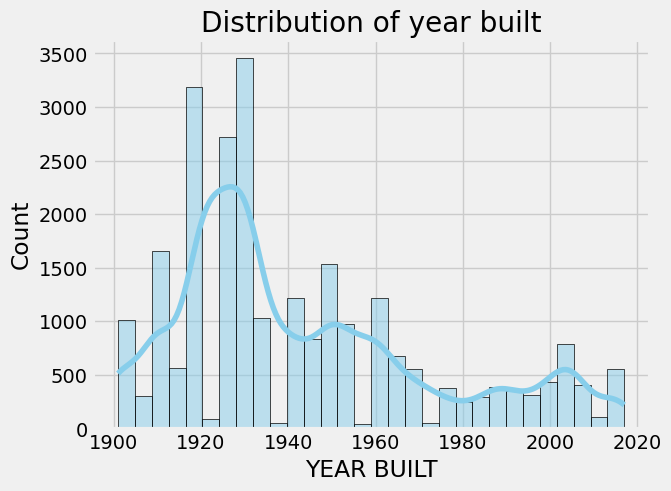

In [703]:
dis_after1750 = df[df['YEAR BUILT']>1900]

sns.histplot(dis_after1750['YEAR BUILT'], bins=30, color='skyblue', edgecolor='black', kde=True,)
plt.title('Distribution of year built')
plt.show()

<Figure size 1000x600 with 0 Axes>

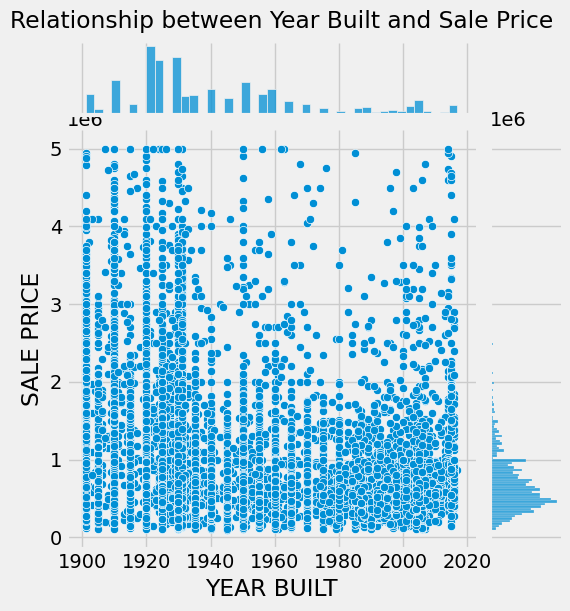

In [704]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='YEAR BUILT', y='SALE PRICE', data=dis_after1750, kind='scatter')
plt.suptitle('Relationship between Year Built and Sale Price', y=1.02)
plt.show()

### The Distribution of Year Built by Borough (After 1900)

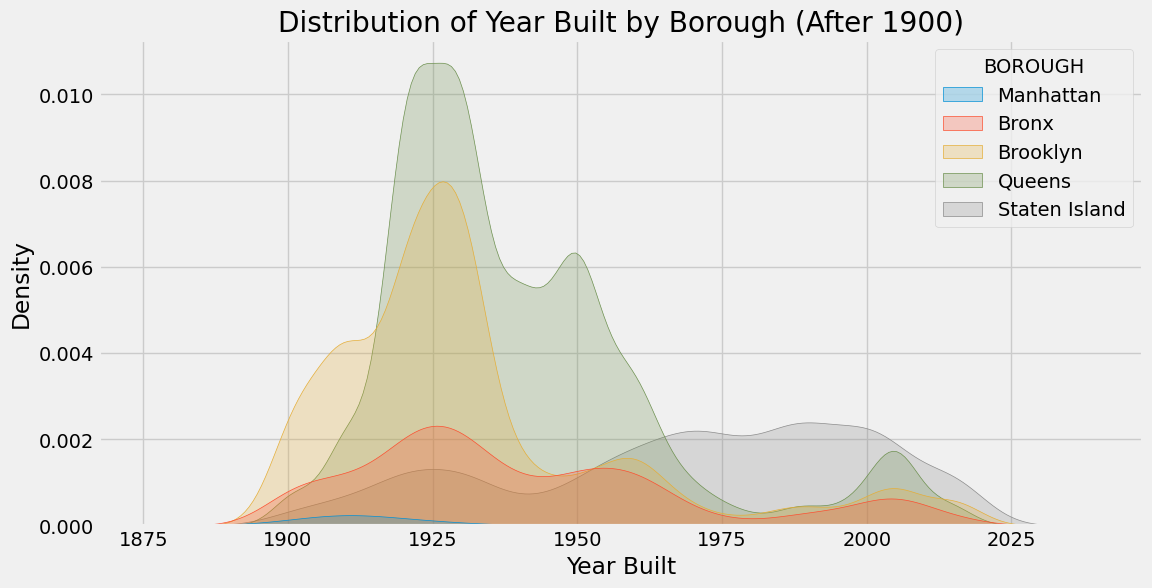

In [705]:
dis_after1750 = df[df['YEAR BUILT'] > 1900]

plt.figure(figsize=(12, 6))
sns.kdeplot(data=dis_after1750, x='YEAR BUILT', hue='BOROUGH', fill=True)
plt.title('Distribution of Year Built by Borough (After 1900)')
plt.xlabel('Year Built')
plt.ylabel('Density')
plt.show()


### The distribution of properties across different boroughs ('BOROUGH')?

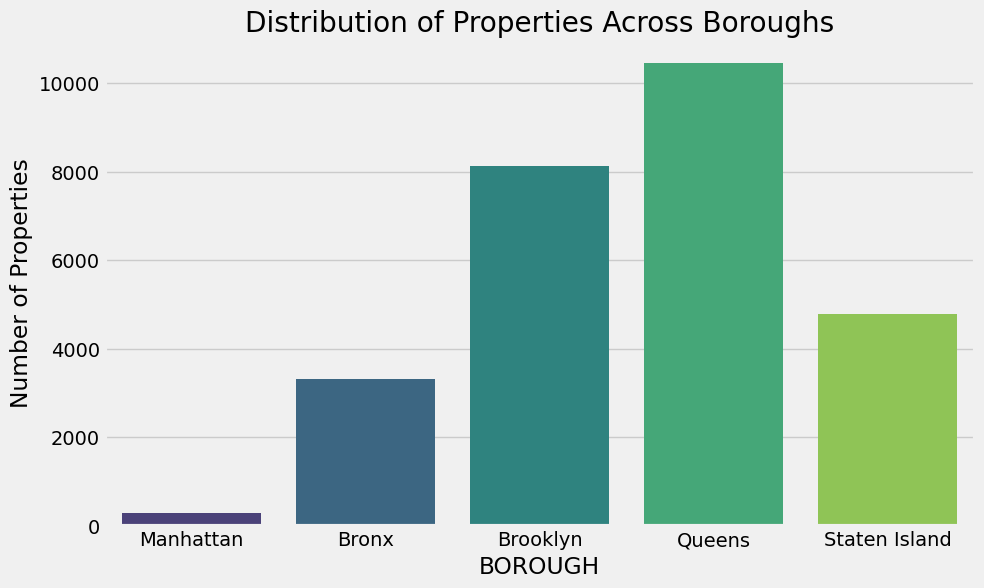

In [706]:
plt.figure(figsize=(10, 6))
borough_distribution = df['BOROUGH'].value_counts()

sns.barplot(x=borough_distribution.index, y=borough_distribution.values, palette="viridis")
plt.title('Distribution of Properties Across Boroughs')
plt.ylabel('Number of Properties')
plt.show()

### The Distribution of Sale Prices Across Price Ranges and Tax Classes

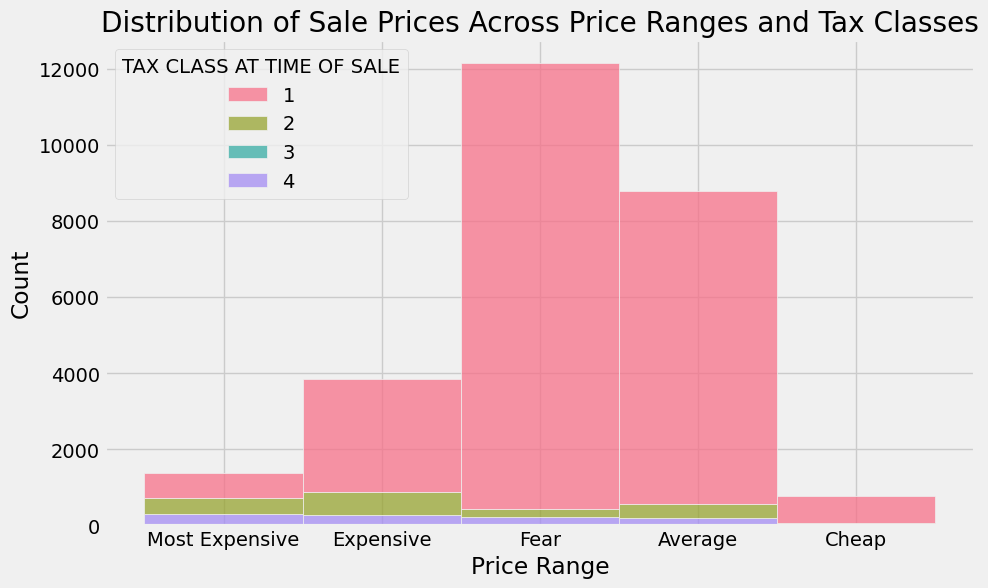

In [707]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='PRICE RANGE', hue='TAX CLASS AT TIME OF SALE', multiple="stack", bins=30, palette='husl')
plt.title('Distribution of Sale Prices Across Price Ranges and Tax Classes')
plt.xlabel('Price Range')
plt.ylabel('Count')
#plt.legend(title='Tax Class')
plt.show()


### Tax classes distribution in sale time and present

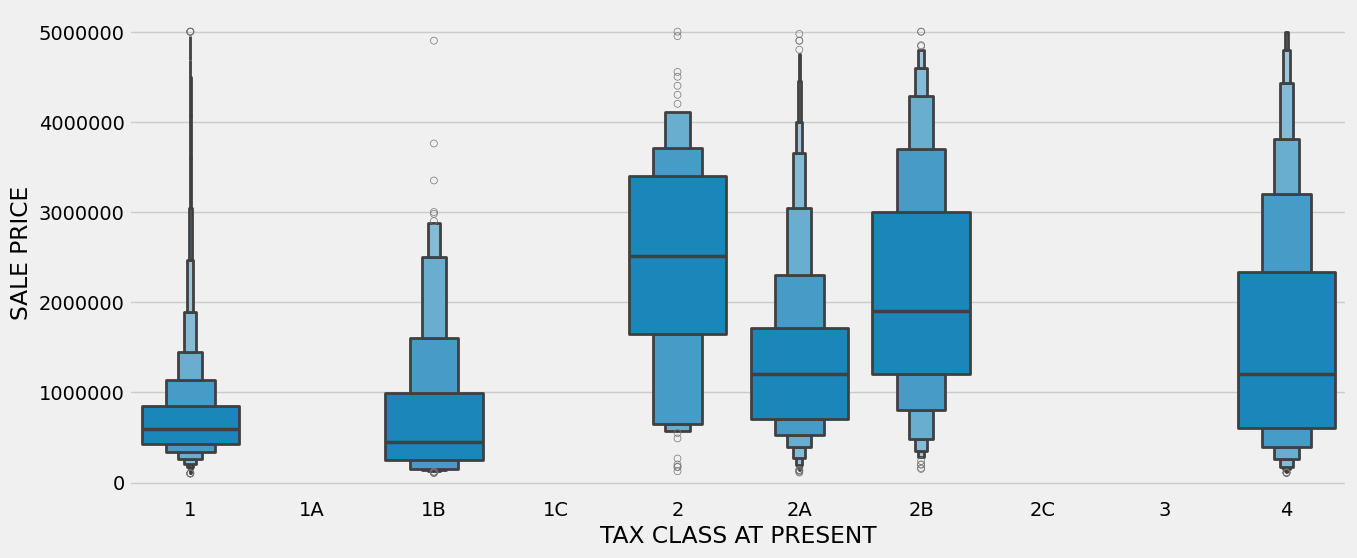

In [708]:
plt.figure(figsize=(14, 6))
sns.boxenplot(df, x='TAX CLASS AT PRESENT', y='SALE PRICE')
plt.ticklabel_format(style='plain', axis='y')  # To ensures the y-axis labels are displayed in plain format
plt.show()

<Axes: xlabel='TAX CLASS AT TIME OF SALE', ylabel='SALE PRICE'>

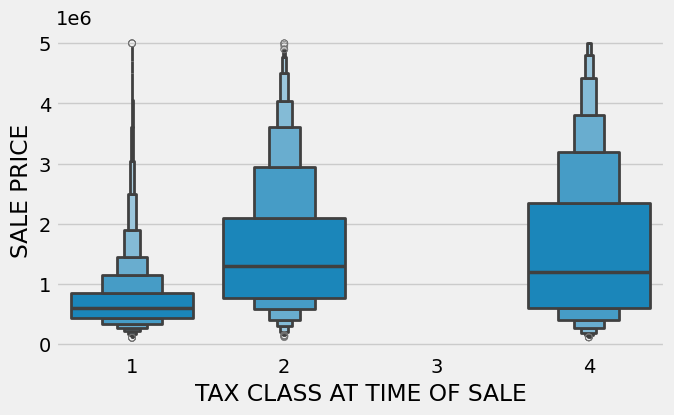

In [709]:
plt.figure(figsize=(7, 4))
sns.boxenplot(y='SALE PRICE', x='TAX CLASS AT TIME OF SALE', data=df)

# Exploratory Data Analysis

### The co relation between land square feet vs gross square feet

In [710]:
# The correlation coefficient
correlation_coefficient = df['LAND SQUARE FEET'].corr(df['GROSS SQUARE FEET'])
print(f"The Correlation between LAND SQUARE FEET and GROSS SQUARE FEET: {correlation_coefficient}")

The Correlation between LAND SQUARE FEET and GROSS SQUARE FEET: 0.23701448282507798


### List of the top 10 BUILDING CLASS CATEGORY with the highest Count and Average sale price

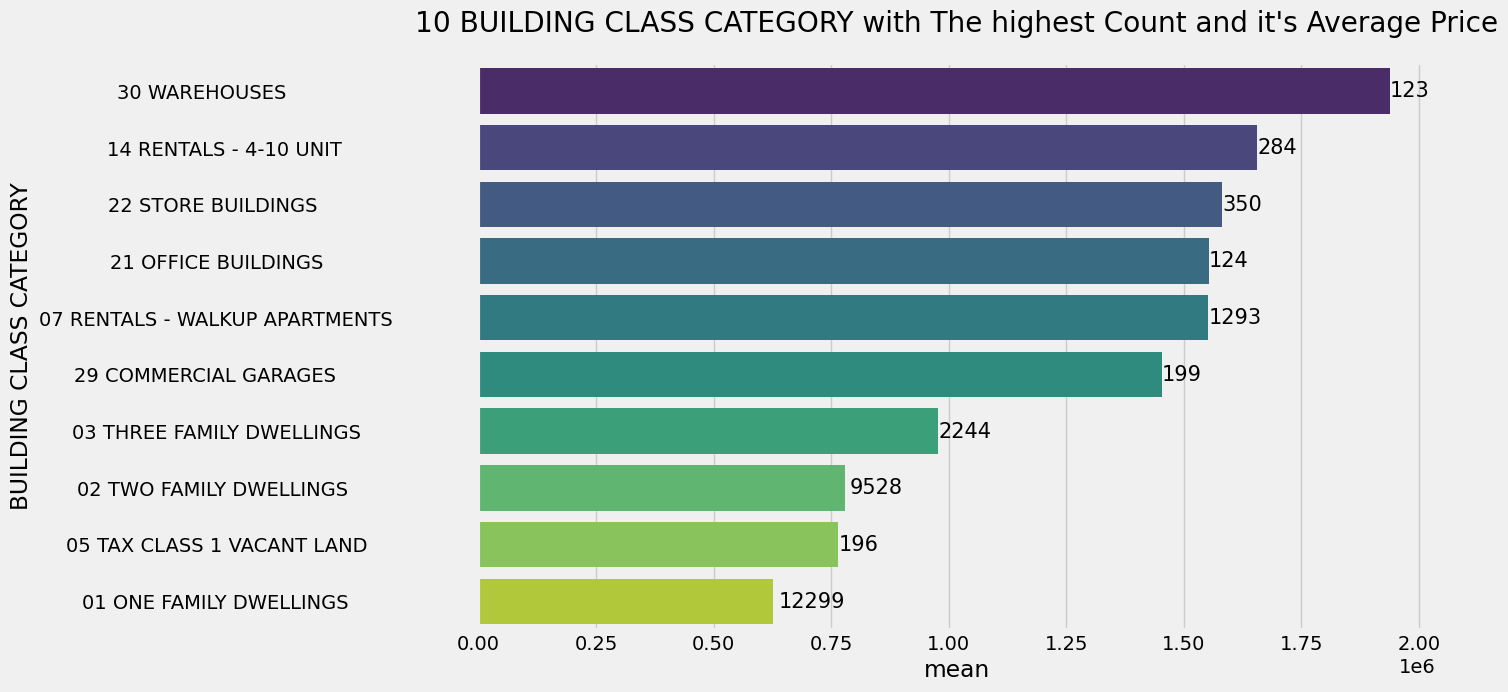

In [711]:
plt.figure(figsize=(11, 7))

aggOf_Neighbor = df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].agg(['count' ,'mean']).sort_values('count',ascending=False).head(10)
sortByMean = aggOf_Neighbor.sort_values('mean', ascending=False)

ax = sns.barplot(y=sortByMean.index, x=sortByMean['mean'], order=sortByMean.index,
                 palette='viridis')

plt.title("10 BUILDING CLASS CATEGORY with The highest Count and it's Average Price", y=1.04)
#plt.xticks(rotation=45, ha='right', size=13)

#for i, (count, mean) in enumerate(zip(sortByMean['count'], sortByMean['mean'])):
    #plt.text(i, mean + count, f'{count}', ha='center', va='bottom', size=15)

for i, (count, mean) in enumerate(zip(sortByMean['count'], sortByMean['mean'])):
    plt.text(mean + count, i, f'{count}', ha='left', va='center', size=15)

#plt.ticklabel_format(style='plain', axis='y')  # To ensures the y-axis labels are displayed in plain format
plt.show()

### Commercial vs Residential Units by Tax Class

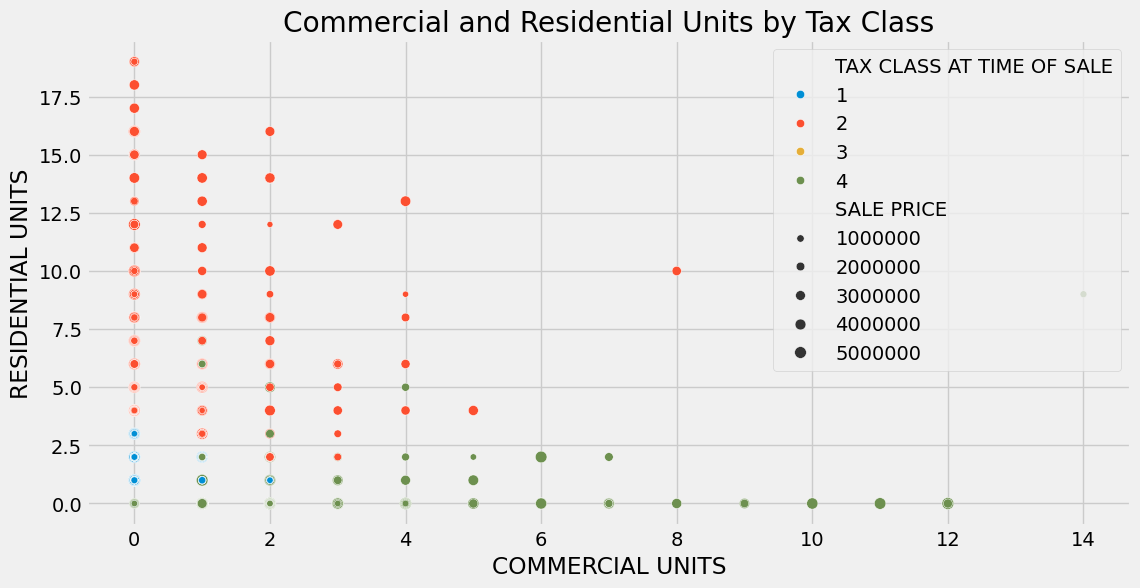

In [712]:
# Filtering
filtered_df = df[(df['YEAR BUILT']>1900) & (df['COMMERCIAL UNITS']<15) & (df['RESIDENTIAL UNITS']<50)]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='COMMERCIAL UNITS', y='RESIDENTIAL UNITS', hue='TAX CLASS AT TIME OF SALE', size='SALE PRICE', data=filtered_df)
plt.title('Commercial and Residential Units by Tax Class')
plt.show()

### Which building class categories ('BUILDING CLASS CATEGORY') are most common?

In [713]:
df = df.reset_index()

In [714]:
building_class_mean_count

,mean,count
BUILDING CLASS CATEGORY,,
01 ONE FAMILY DWELLINGS,625472.41,12299
02 TWO FAMILY DWELLINGS,779713.08,9528
03 THREE FAMILY DWELLINGS,976568.95,2244
07 RENTALS - WALKUP APARTMENTS,1551156.42,1293
22 STORE BUILDINGS,1580706.15,350


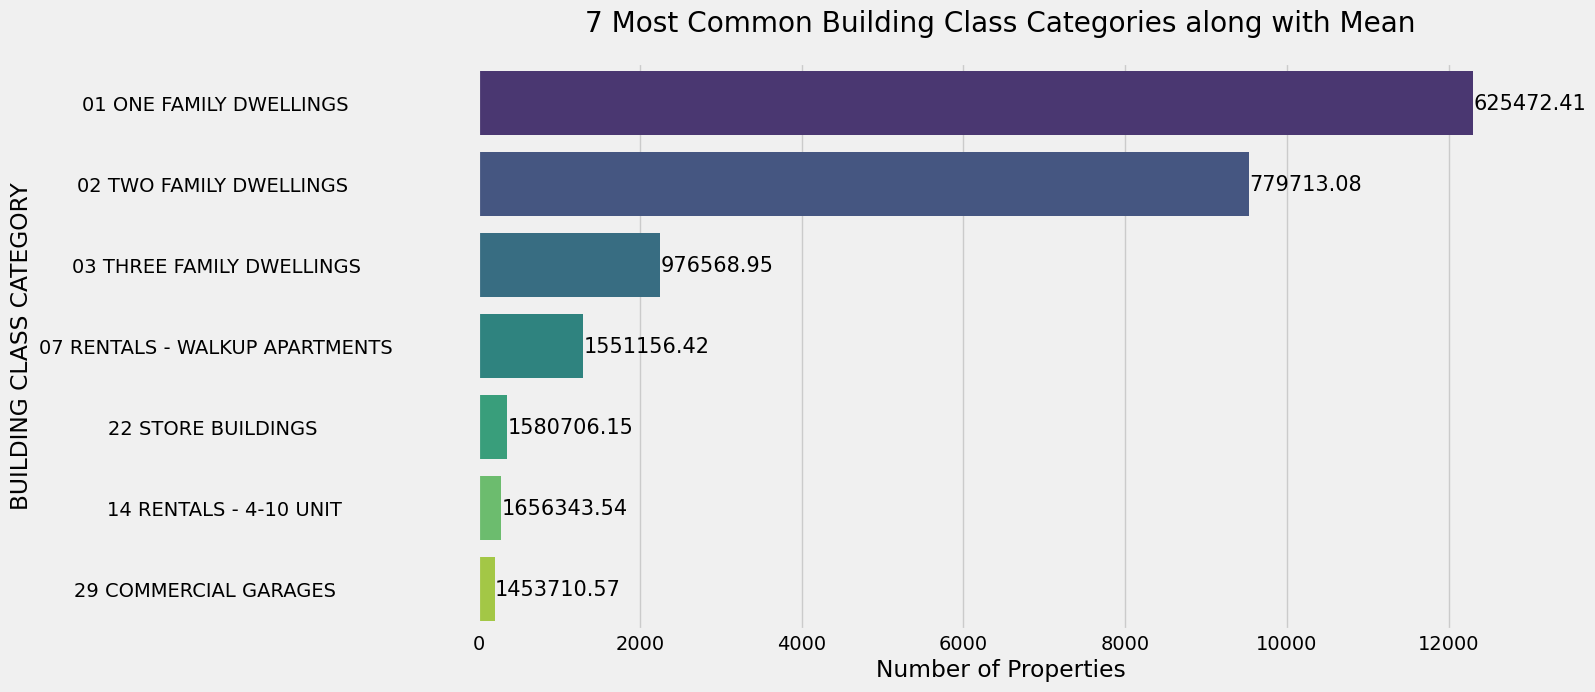

In [750]:
plt.figure(figsize=(12, 7))

building_class_mean_count = df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].agg(['mean', 'count']).sort_values(by = 'count', ascending=False).head(7)

sns.barplot(x=building_class_mean_count['count'], y=building_class_mean_count.index, 
            order=building_class_mean_count.index, palette="viridis")

for i, (count, mean) in enumerate(zip(building_class_mean_count['count'], building_class_mean_count['mean'])):
    plt.text(count + 6, i, f'{mean:.2f}', ha='left', va='center', size=15)

plt.title('7 Most Common Building Class Categories along with Mean', y=1.04)
plt.xlabel('Number of Properties')
plt.show()

### The Top 20 neighborhoods with the highest property count and determine the mean property value for each of these neighborhoods.

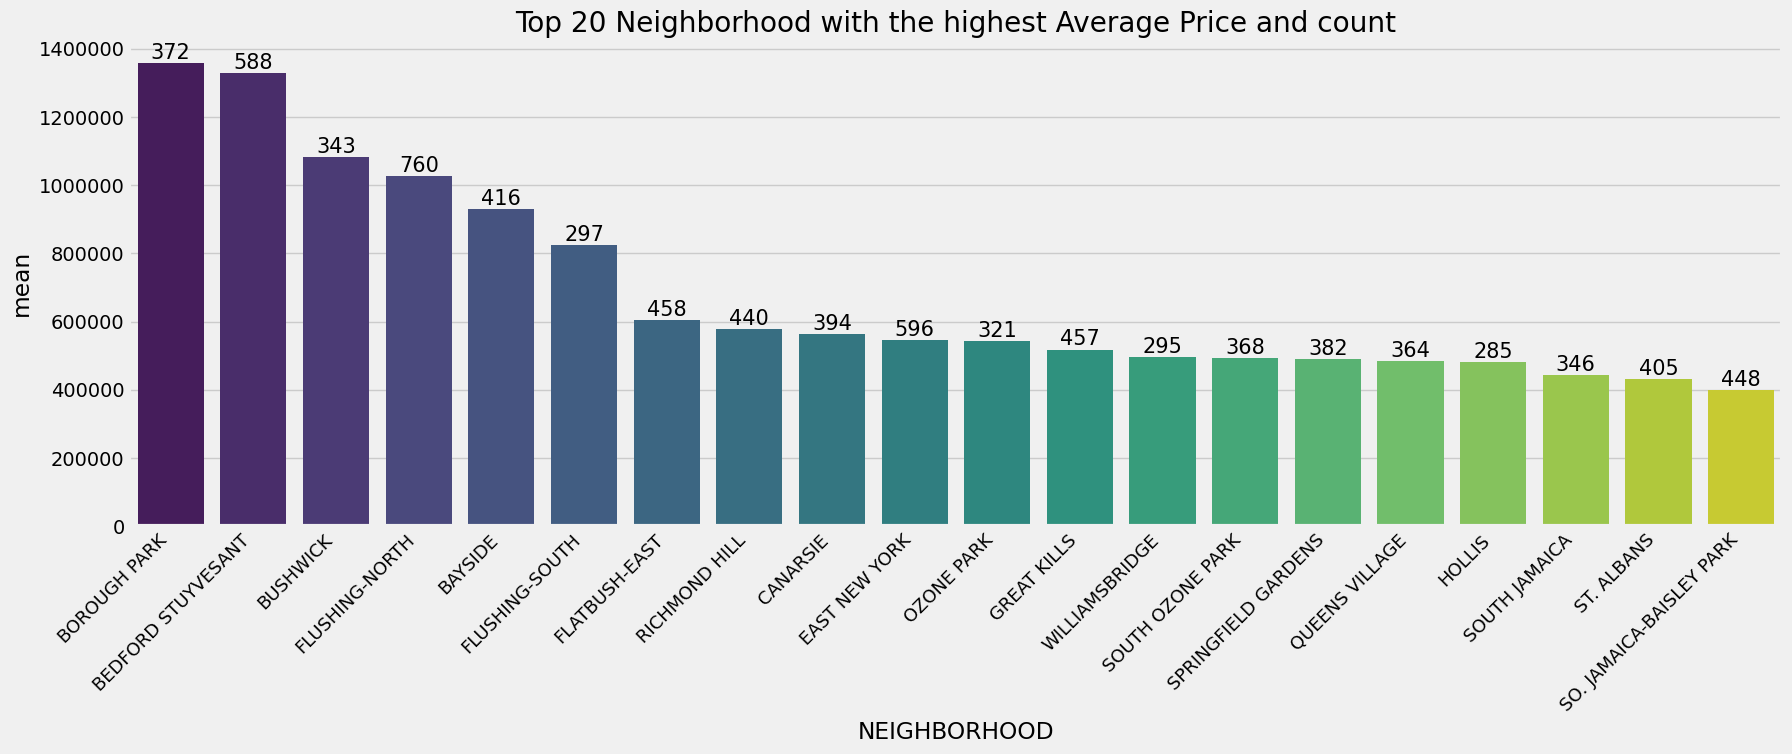

In [747]:
plt.figure(figsize=(19, 6))

aggOf_Neighbor = df.groupby('NEIGHBORHOOD')['SALE PRICE'].agg(['count' ,'mean']).sort_values('count',ascending=False).head(20)
sortByMean = aggOf_Neighbor.sort_values('mean', ascending=False)

ax = sns.barplot(x=sortByMean.index, y=sortByMean['mean'], order=sortByMean.index, 
                 palette='viridis')


plt.title("Top 20 Neighborhood with the highest Average Price and count")
plt.xticks(rotation=45, ha='right', size=13)

for i, (count, mean) in enumerate(zip(sortByMean['count'], sortByMean['mean'])):
    plt.text(i, mean + count, f'{count}', ha='center', va='bottom', size=15)

plt.ticklabel_format(style='plain', axis='y')  # To ensures the y-axis labels are displayed in plain format
plt.show()


### The top-performing building classes based on their total sale price and mean sale price

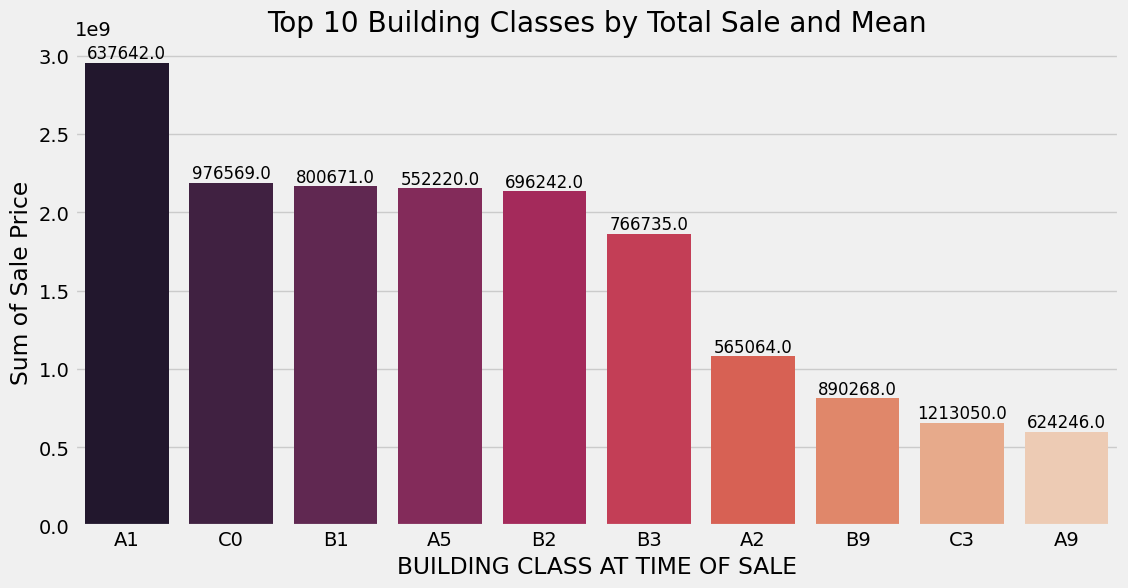

In [654]:
plt.figure(figsize=(12, 6))
with_zero_count = df.groupby('BUILDING CLASS AT TIME OF SALE')['SALE PRICE'].agg(['mean', 'count', 'sum']).sort_values('sum', ascending=False).head(10)
filtered_df = with_zero_count[with_zero_count['count'] > 0]

ax =sns.barplot(x=filtered_df.index, y=filtered_df['sum'], order = filtered_df.index,
           palette='rocket')

plt.ylabel('Sum of Sale Price')
plt.title('Top 10 Building Classes by Total Sale and Mean')

for i, (sum, mean) in enumerate(zip(filtered_df['sum'], filtered_df['mean'].round())):
    plt.text(i, mean + sum, f'{mean}', ha='center', va= 'bottom', size=12)
    
plt.show()

### The top 10 building classes with the lowest mean sale prices and count

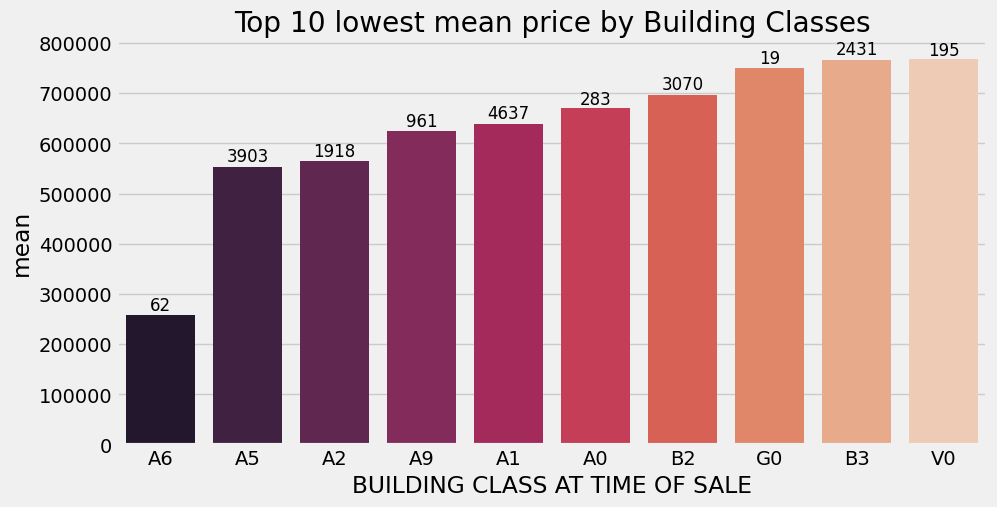

In [655]:
plt.figure(figsize=(10, 5))
with_zero_count = df.groupby('BUILDING CLASS AT TIME OF SALE')['SALE PRICE'].agg(['mean', 'count']).sort_values('mean', ascending=True)
filtered_df = with_zero_count[with_zero_count['count'] > 10].head(10)

ax =sns.barplot(x=filtered_df.index, y=filtered_df['mean'], order = filtered_df.index, palette='rocket')

plt.title('Top 10 lowest mean price by Building Classes')

for i, (count, mean) in enumerate(zip(filtered_df['count'], filtered_df['mean'].round())):
    plt.text(i, count + mean, f'{count}', ha='center', va= 'bottom', size=12)
    
plt.show()

### Top 10 Building Classes with Highest Mean Sale Price and count

In [751]:
df.head()

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,PRICE RANGE
0,3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23,Most Expensive
1,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23,Most Expensive
2,172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,10009,3,1,4,1520,3360,1910,2,S3,3300000,2016-11-15,Most Expensive
3,174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,183 AVENUE B,10009,5,1,6,1779,3713,1910,2,S5,4750000,2017-04-03,Most Expensive
4,195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,10009,0,1,1,1218,3586,1899,4,K4,3700000,2016-09-28,Most Expensive


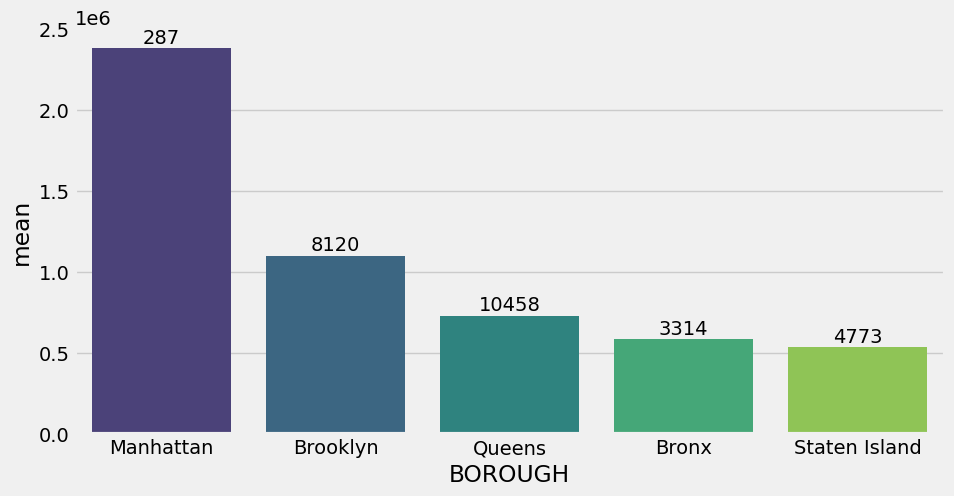

,mean,count
BOROUGH,,
Manhattan,2382055.46,287
Brooklyn,1096351.70,8120
Queens,728421.63,10458
Bronx,586003.67,3314
Staten Island,532137.30,4773


In [753]:
plt.figure(figsize=(10, 5))
HMPrice = df.groupby('BOROUGH')['SALE PRICE'].agg(['mean', 'count']).sort_values('mean', ascending=False)
highMeanP = HMPrice[HMPrice['count']>5].head(10)

sns.barplot(x=highMeanP.index, y=highMeanP['mean'], order= 
            highMeanP.index, palette='viridis')

for i, (mean, count) in enumerate(zip(highMeanP['mean'], highMeanP['count'])):
        plt.text(i, count + mean, f'{count}', ha='center', va='bottom')

plt.show()
highMeanP